# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [15]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
penguins = penguins.dropna()

In [5]:
X = penguins.drop(columns = "bill_depth_mm")
y = penguins["bill_depth_mm"]

In [6]:
# ct
ct = ColumnTransformer(
  [("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
  make_column_selector(dtype_include = object)),
  ("standardize",
  StandardScaler(),
  make_column_selector(dtype_include = np.number))],
  remainder = "passthrough"
  ).set_output(transform = "pandas")

In [7]:
# linear
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
  )
lr_fitted = lr_pipeline.fit(X, y)
cross_val_score(lr_pipeline, X, y, cv = 5, scoring = "r2").mean()

np.float64(0.39483783629128955)

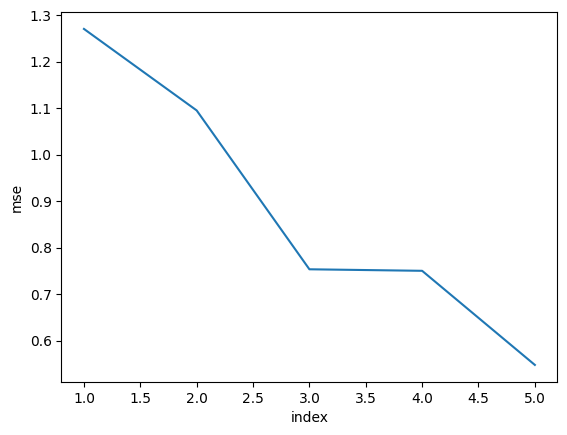

In [8]:
lr_mse = -cross_val_score(lr_pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error")
lr_df = pd.DataFrame({
    "index": [1, 2, 3, 4, 5],
    "mse": lr_mse})
sns.lineplot(data = lr_df, x = "index", y = "mse")
plt.show()

In [9]:
# knn = 2
knn_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsRegressor(n_neighbors = 2))]
  ).set_output(transform = "pandas")
knn_fitted_2 = knn_pipeline_2.fit(X, y)
cross_val_score(knn_pipeline_2, X, y, cv = 5, scoring = "r2").mean()

np.float64(0.1283646027632394)

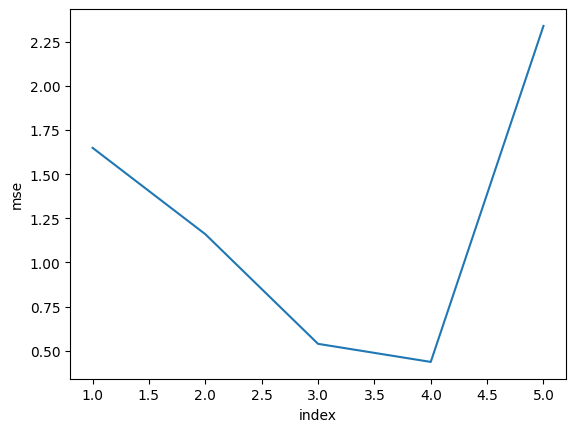

In [10]:
knn_2_mse = -cross_val_score(knn_pipeline_2, X, y, cv = 5, scoring = "neg_mean_squared_error")
knn_2_df = pd.DataFrame({
    "index": [1, 2, 3, 4, 5],
    "mse": knn_2_mse})
sns.lineplot(data = knn_2_df, x = "index", y = "mse")
plt.show()

In [11]:
# knn = 4
knn_pipeline_4 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsRegressor(n_neighbors = 4))]
  ).set_output(transform = "pandas")
knn_fitted_4 = knn_pipeline_4.fit(X, y)
cross_val_score(knn_pipeline_4, X, y, cv = 5, scoring = "r2").mean()

np.float64(0.19358549316864057)

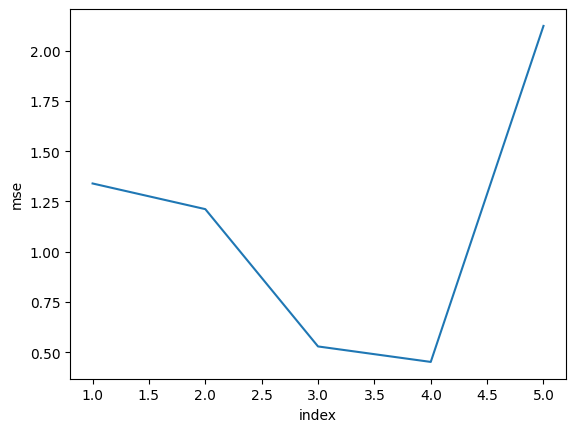

In [12]:
knn_4_mse = -cross_val_score(knn_pipeline_4, X, y, cv = 5, scoring = "neg_mean_squared_error")
knn_4_df = pd.DataFrame({
    "index": [1, 2, 3, 4, 5],
    "mse": knn_4_mse})
sns.lineplot(data = knn_4_df, x = "index", y = "mse")
plt.show()

In [13]:
# decision tree
dt_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeRegressor(max_depth = 2))]
  ).set_output(transform = "pandas")
dt_fitted = dt_pipeline.fit(X, y)
cross_val_score(dt_pipeline, X, y, cv = 5, scoring = "r2").mean()

np.float64(0.48402833553965297)

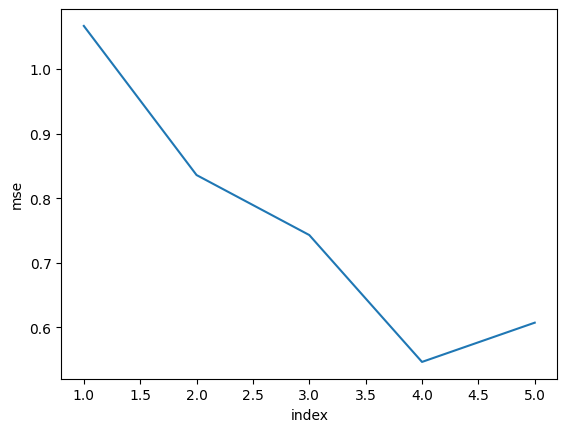

In [14]:
dt_mse = -cross_val_score(dt_pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error")
dt_df = pd.DataFrame({
    "index": [1, 2, 3, 4, 5],
    "mse": dt_mse})
sns.lineplot(data = dt_df, x = "index", y = "mse")
plt.show()

The decision tree model is the best with the highest R2 and lowest average MSE scores.